# Retention Model to Predict Retention at Westminster College.

### Read the CSV file:

The data was pulled from two local databases on campus. The data was exported from the querey into a .csv file. We will be importing the StudentData.csv file to analyze further. 

In [3]:
# read in the .csv file of student data

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

student_data = pd.read_csv("StudentData.csv")

In [4]:
#look at what the data looks like in the dataframe

print(student_data)

      ID_NUM  Gender  Resident  ACT_SCORE  ACT_RECEIVED  HS_GPA  Athlete  \
0          1       1         1       22.0             1    3.21        0   
1          2       1         1       22.0             1    3.66        1   
2          3       0         1        NaN             0    2.88        0   
3          4       1         1       30.0             1    3.73        1   
4          5       1         1        NaN             0    3.92        1   
...      ...     ...       ...        ...           ...     ...      ...   
5058    5059       0         1        NaN             0     NaN        0   
5059    5060       1         0        NaN             0     NaN        0   
5060    5061       1         0       17.0             1     NaN        0   
5061    5062       0         1       18.0             1     NaN        1   
5062    5063       1         0        NaN             0     NaN        0   

      Retained  
0            0  
1            1  
2            1  
3            1  
4 

In [5]:
# look at what columns are in the data set

student_data.columns

Index(['ID_NUM', 'Gender', 'Resident', 'ACT_SCORE', 'ACT_RECEIVED', 'HS_GPA',
       'Athlete', 'Retained'],
      dtype='object')

In [6]:
# see the stats of the data, mostly curious about ACT scores and HS GPA as others are binary 1 or 0.

student_data.describe()

,ID_NUM,Gender,Resident,ACT_SCORE,ACT_RECEIVED,HS_GPA,Athlete,Retained
count,5063.000000,5063.000000,5063.000000,4189.000000,5063.000000,3997.000000,5063.000000,5063.000000
mean,2532.000000,0.458424,0.950622,23.889472,0.827375,2.978556,0.426230,0.639542
std,1461.706537,0.498318,0.216677,4.022140,0.377960,1.287854,0.494577,0.480181
min,1.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,1266.500000,0.000000,1.000000,21.000000,1.000000,2.840000,0.000000,0.000000
50%,2532.000000,0.000000,1.000000,24.000000,1.000000,3.410000,0.000000,1.000000
75%,3797.500000,1.000000,1.000000,27.000000,1.000000,3.800000,1.000000,1.000000
max,5063.000000,1.000000,1.000000,35.000000,1.000000,5.140000,1.000000,1.000000


### Cleaning the Data

Below will be various methods for ensuring the data is cleaned.

In [8]:
# remove duplicates

student_data.drop_duplicates(inplace = True)

print(student_data)

      ID_NUM  Gender  Resident  ACT_SCORE  ACT_RECEIVED  HS_GPA  Athlete  \
0          1       1         1       22.0             1    3.21        0   
1          2       1         1       22.0             1    3.66        1   
2          3       0         1        NaN             0    2.88        0   
3          4       1         1       30.0             1    3.73        1   
4          5       1         1        NaN             0    3.92        1   
...      ...     ...       ...        ...           ...     ...      ...   
5058    5059       0         1        NaN             0     NaN        0   
5059    5060       1         0        NaN             0     NaN        0   
5060    5061       1         0       17.0             1     NaN        0   
5061    5062       0         1       18.0             1     NaN        1   
5062    5063       1         0        NaN             0     NaN        0   

      Retained  
0            0  
1            1  
2            1  
3            1  
4 

In [9]:
#check for null values and the percent that are null in each column

student_data.isnull()

,ID_NUM,Gender,Resident,ACT_SCORE,ACT_RECEIVED,HS_GPA,Athlete,Retained
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
5058,False,False,False,True,False,True,False,False
5059,False,False,False,True,False,True,False,False
5060,False,False,False,False,False,True,False,False
5061,False,False,False,False,False,True,False,False


In [10]:
#checking for nulls by column

student_data.isnull().any()

ID_NUM          False
Gender          False
Resident        False
ACT_SCORE        True
ACT_RECEIVED    False
HS_GPA           True
Athlete         False
Retained        False
dtype: bool

In [11]:
#can see nulls in ACT_Score, and HS_GPA
#now a look at the percent null for each column

student_data.isnull().sum()/student_data.shape[0]

ID_NUM          0.000000
Gender          0.000000
Resident        0.000000
ACT_SCORE       0.172625
ACT_RECEIVED    0.000000
HS_GPA          0.210547
Athlete         0.000000
Retained        0.000000
dtype: float64

In [12]:
#See what the average is for ACT Scores and High school GPAs that will be used to replace the Null values
print ("ACT Score Average is:", student_data.ACT_SCORE.mean())
print ("High School GPA Average is:", student_data.HS_GPA.mean())

ACT Score Average is: 23.889472427787062
High School GPA Average is: 2.978555666750063


In [14]:
#Find any null values in the ACT Score column and the HS GPA Column and replace with the average

student_data.ACT_SCORE.fillna(student_data.ACT_SCORE.mean(),inplace = True)
student_data.HS_GPA.fillna(student_data.HS_GPA.mean(),inplace = True)

In [15]:
#New data frame with the null values filled in by average for ACT and HS GPA
print(student_data)

      ID_NUM  Gender  Resident  ACT_SCORE  ACT_RECEIVED    HS_GPA  Athlete  \
0          1       1         1  22.000000             1  3.210000        0   
1          2       1         1  22.000000             1  3.660000        1   
2          3       0         1  23.889472             0  2.880000        0   
3          4       1         1  30.000000             1  3.730000        1   
4          5       1         1  23.889472             0  3.920000        1   
...      ...     ...       ...        ...           ...       ...      ...   
5058    5059       0         1  23.889472             0  2.978556        0   
5059    5060       1         0  23.889472             0  2.978556        0   
5060    5061       1         0  17.000000             1  2.978556        0   
5061    5062       0         1  18.000000             1  2.978556        1   
5062    5063       1         0  23.889472             0  2.978556        0   

      Retained  
0            0  
1            1  
2           

In [16]:
#After initial inspection of box plots, can see values of 0 that may have been mis entered. Treating them like nulls and replacing 0 values with the average of the column

mean = student_data['HS_GPA'].mean()
student_data.loc[student_data['HS_GPA'] == 0, 'HS_GPA'] = mean

In [17]:
#looking at new top 20 act scores 
student_data.ACT_SCORE.head(20)

0     22.000000
1     22.000000
2     23.889472
3     30.000000
4     23.889472
5     21.000000
6     29.000000
7     31.000000
8     20.000000
9     28.000000
10    25.000000
11    20.000000
12    22.000000
13    28.000000
14    27.000000
15    26.000000
16    23.000000
17    24.000000
18    25.000000
19    22.000000
Name: ACT_SCORE, dtype: float64

In [20]:
#looking at new top 20 HS GPA
student_data.HS_GPA.head(20)

0     3.21
1     3.66
2     2.88
3     3.73
4     3.92
5     3.68
6     2.33
7     4.56
8     3.36
9     4.17
10    3.76
11    3.54
12    3.27
13    3.83
14    3.01
15    3.95
16    2.79
17    2.82
18    3.84
19    3.07
Name: HS_GPA, dtype: float64

In [22]:
#a look at first 10 and last ten records
student_data.head(10)

,ID_NUM,Gender,Resident,ACT_SCORE,ACT_RECEIVED,HS_GPA,Athlete,Retained
0,1,1,1,22.000000,1,3.21,0,0
1,2,1,1,22.000000,1,3.66,1,1
2,3,0,1,23.889472,0,2.88,0,1
3,4,1,1,30.000000,1,3.73,1,1
4,5,1,1,23.889472,0,3.92,1,1
5,6,0,1,21.000000,1,3.68,0,1
6,7,0,1,29.000000,1,2.33,0,0
7,8,1,1,31.000000,1,4.56,0,1
8,9,0,1,20.000000,1,3.36,0,1
9,10,1,1,28.000000,1,4.17,0,1


In [23]:
student_data.tail(10)

,ID_NUM,Gender,Resident,ACT_SCORE,ACT_RECEIVED,HS_GPA,Athlete,Retained
5053,5054,0,1,14.000000,1,2.978556,1,1
5054,5055,0,1,18.000000,1,2.978556,1,1
5055,5056,1,1,17.000000,1,2.978556,1,1
5056,5057,0,1,23.889472,0,2.978556,0,0
5057,5058,1,1,23.889472,0,2.978556,0,0
5058,5059,0,1,23.889472,0,2.978556,0,0
5059,5060,1,0,23.889472,0,2.978556,0,1
5060,5061,1,0,17.000000,1,2.978556,0,1
5061,5062,0,1,18.000000,1,2.978556,1,1
5062,5063,1,0,23.889472,0,2.978556,0,0


### Exploritory Data Analysis

A look at the data, some charts will be created to look at the features, and look for any outliers, and how they may group together

<AxesSubplot:>

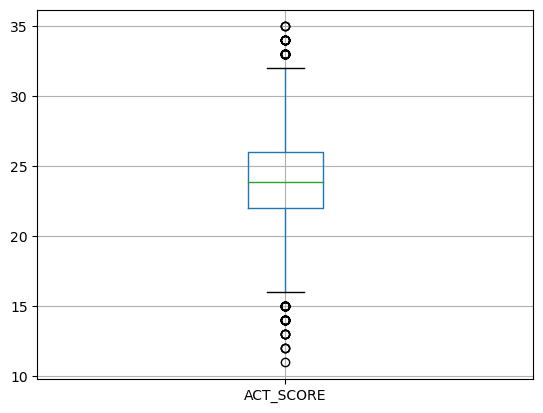

In [28]:
#box plot for ACT Scores
student_data.boxplot('ACT_SCORE')

array([[<AxesSubplot:title={'center':'ACT_SCORE'}>]], dtype=object)

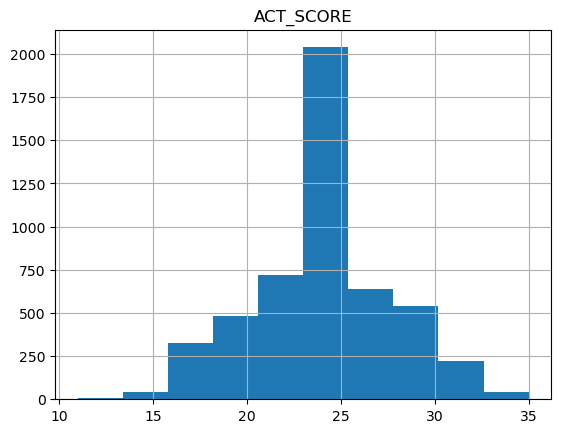

In [29]:
#histogram of act scores
student_data.hist('ACT_SCORE')

<AxesSubplot:>

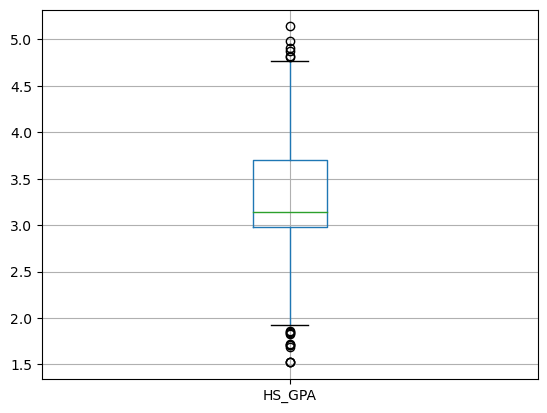

In [30]:
#boxplot of HS_GPA
student_data.boxplot('HS_GPA')

array([[<AxesSubplot:title={'center':'HS_GPA'}>]], dtype=object)

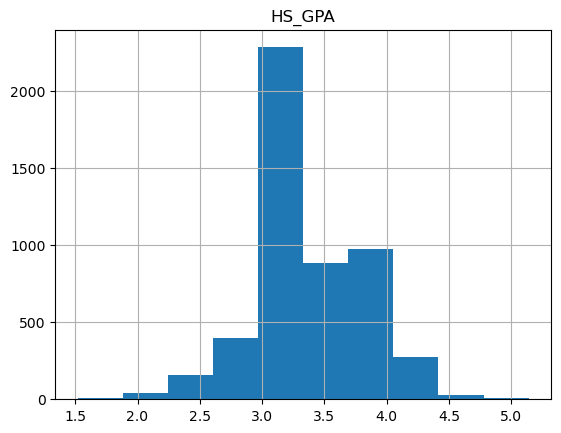

In [31]:
#histogram of HS_GPA
student_data.hist('HS_GPA')

In [33]:
#correlation of features in the student data set with ACT Scores

student_data[['ACT_SCORE', 'HS_GPA','Gender','Resident','Athlete','Retained']].corr()

,ACT_SCORE,HS_GPA,Gender,Resident,Athlete,Retained
ACT_SCORE,1.000000,0.472962,0.051939,0.106525,-0.142253,0.182637
HS_GPA,0.472962,1.000000,0.202624,0.083394,-0.017869,0.219257
Gender,0.051939,0.202624,1.000000,-0.008039,-0.209431,0.064911
Resident,0.106525,0.083394,-0.008039,1.000000,0.052644,0.109908
Athlete,-0.142253,-0.017869,-0.209431,0.052644,1.000000,0.059783
Retained,0.182637,0.219257,0.064911,0.109908,0.059783,1.000000


In [34]:
#correlation of features in the student data set with ACT test score received

student_data[['ACT_RECEIVED', 'HS_GPA','Gender','Resident','Athlete','Retained']].corr()

,ACT_RECEIVED,HS_GPA,Gender,Resident,Athlete,Retained
ACT_RECEIVED,1.000000,0.290736,0.019575,0.006860,0.179156,-0.009841
HS_GPA,0.290736,1.000000,0.202624,0.083394,-0.017869,0.219257
Gender,0.019575,0.202624,1.000000,-0.008039,-0.209431,0.064911
Resident,0.006860,0.083394,-0.008039,1.000000,0.052644,0.109908
Athlete,0.179156,-0.017869,-0.209431,0.052644,1.000000,0.059783
Retained,-0.009841,0.219257,0.064911,0.109908,0.059783,1.000000


<AxesSubplot:>

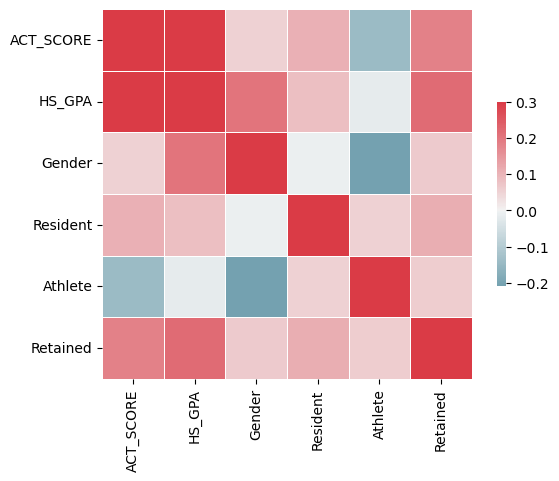

In [36]:
#heat chart for correlation of features for act scores
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(student_data[['ACT_SCORE', 'HS_GPA','Gender','Resident','Athlete','Retained']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidth=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

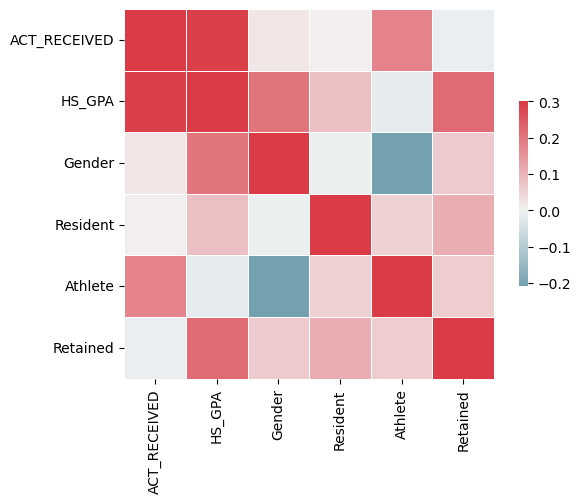

In [37]:
#heat chart for correlation of features with ACT test received

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(student_data[['ACT_RECEIVED', 'HS_GPA','Gender','Resident','Athlete','Retained']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidth=.5, cbar_kws={"shrink": .5})

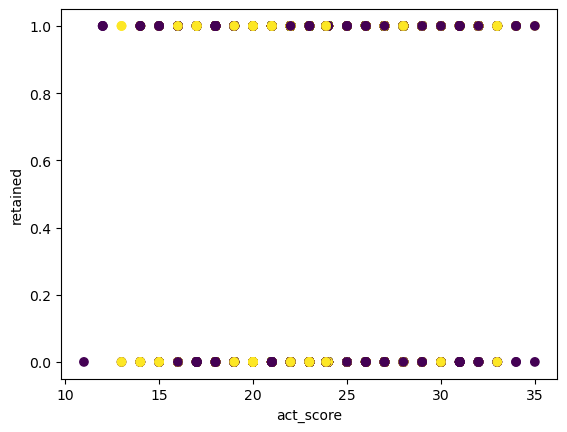

In [39]:
#Scatter plot act score vs retained, colored by gender

retain = student_data['Retained']
act_score = student_data['ACT_SCORE']
#plt.scatter(height, weight)
#plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')
#plt.show()

gender = student_data['Gender']
plt.scatter(act_score, retain, c=gender)
plt.xlabel('act_score')
plt.ylabel('retained')
plt.show()

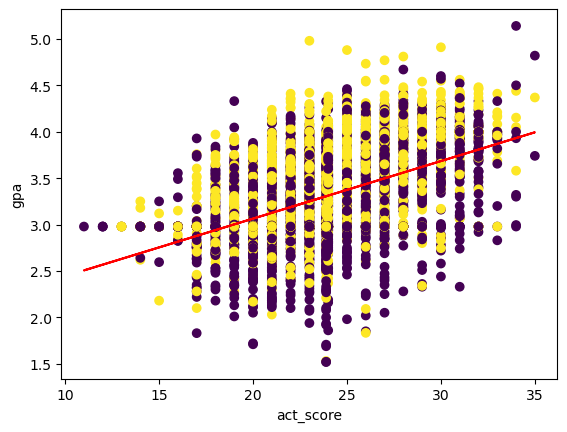

In [47]:
#Curious look at ACT Scores vs High School GPA's

gpa = student_data['HS_GPA']
act_scores = student_data['ACT_SCORE']
#plt.scatter(height, weight)
#plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')
#plt.show()

gender = student_data['Gender']
plt.scatter(act_scores, gpa, c=gender)
plt.xlabel('act_score')
plt.ylabel('gpa')
z = np.polyfit(act_scores, gpa, 1)
p = np.poly1d(z)
plt.plot(act_scores,p(act_scores),"red")
plt.show()

### Training the model and selecting

Various models will be trained, tested, and compared to select the best working model for the problem (linear Regression, Decision Tree, Neural Net, ADA Boosted)

In [48]:
#the test data set will be split into train and test, the test size will be 20 percent of the data set

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance

train_set, test_set = train_test_split(student_data,
                                       test_size=0.2,random_state=123)

print('Train size:', len(train_set), 'Test size:', len(test_set))



Train size: 4050 Test size: 1013


In [56]:
#Model 1 - Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['ACT_SCORE', 'HS_GPA', 'Gender', 'Resident','Athlete']]
y = train_set['Retained']
X_test = test_set[['ACT_SCORE', 'HS_GPA', 'Gender','Resident','Athlete']]
y_test = test_set['Retained']

lr_model = LinearRegression()
lr_model.fit(X,y)

###Predictoin of the model with training data

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

### Getting the performance of model on the test data

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -0.4095416424874442
 Coefficients [0.01361052 0.15729609 0.03985073 0.16511703 0.08239223]
 Score 0.06899274398522293
MAE is  0.42578969531126254
RMSE is  0.4613669346522417
MSE is  0.21285944839040585
R^2  0.06899274398522293

Results for linear regression on test data
MAE is  0.4338361915320512
RMSE is  0.46917166925379195
MSE is  0.22012205523038955
R^2  0.07209229150763419


In [54]:
#Alternate library linear regression model

import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

#very similar results to sklearn model it appears

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Retained   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     59.94
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.09e-60
Time:                        23:05:29   Log-Likelihood:                -2613.8
No. Observations:                4050   AIC:                             5240.
Df Residuals:                    4044   BIC:                             5277.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4095      0.063     -6.467      0.000      -0.534      -0.285
ACT_SCORE      0.0136      0.002      5.947      0.000       0.009       0.018
HS_GPA         0.1573      0.018      8.920      0.000       0.123       0.192
Gender         0.0399      0.015      2.600      0.009       0.010       0.070
Resident       0.1651      0.034      4.919      0.000       0.099       0.231
Athlete        0.0824      0.015      5.385      0.000       0.052       0.112
==============================================================================
Omnibus:                    35577.250   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.998
Skew:                          -0.547   Prob(JB):                    2.03e-118
Kurtosis:                       1.581   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

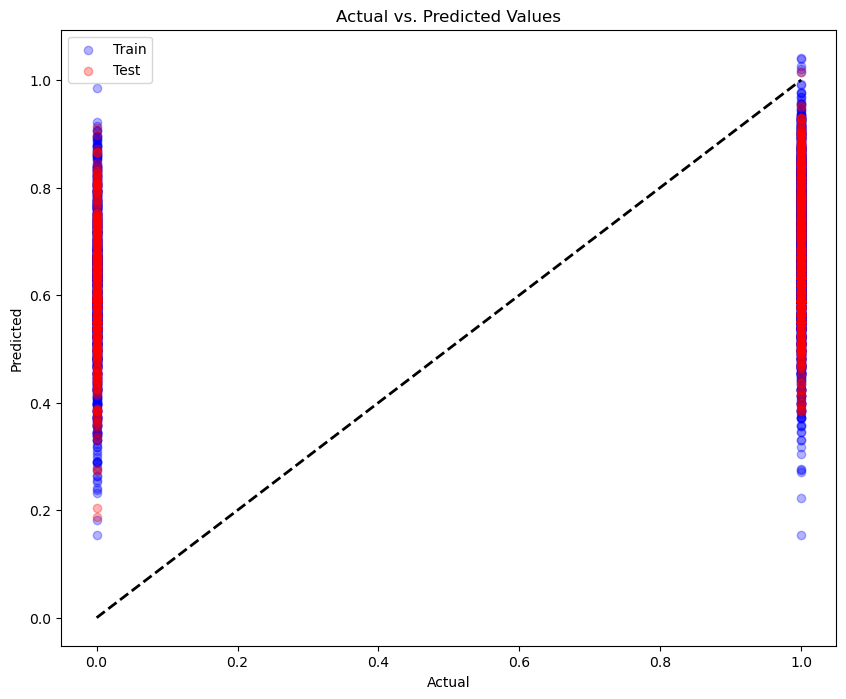

In [57]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y, y_pred, alpha=0.3, label='Train', color='blue')  # Plot training data
plt.scatter(y_test, y_test_pred, alpha=0.3, label='Test', color='red')  # Plot test data

# Plot a diagonal line representing perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

#not the best visual for this purpose as scales are binary for retained or not.

In [50]:
#Model 2 - Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y = train_set['Retained']

X_test = test_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y_test = test_set['Retained']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for decision tree on training data
  Default settings
Confusion Matrix
[[1109  324]
 [ 181 2436]]
Accuracy is   0.8753086419753087
Precision is  0.874499411218881
Recall is     0.8753086419753087
F1 is         0.8736925888352375

Results for decision tree on test data
  Default settings
Confusion Matrix
[[148 244]
 [190 431]]
Accuracy is   0.5715695952615992
Precision is  0.5608736134394878
Recall is     0.5715695952615992
F1 is         0.5646491726279823


In [51]:
#Model 3 - Neural Net

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y = train_set['Retained']

X_test = test_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y_test = test_set['Retained']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                         solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for NN on train data
  Default settings
Confusion Matrix
[[ 274 1159]
 [ 186 2431]]
Accuracy is   0.6679012345679012
Precision is  0.6483195253709162
Recall is     0.6679012345679012
F1 is         0.6085816791933661

Results for NN on test data
  Default settings
Confusion Matrix
[[ 78 314]
 [ 49 572]]
Accuracy is   0.6416584402764067
Precision is  0.6334376940445368
Recall is     0.6416584402764067
F1 is         0.5816807976204702


In [52]:
#Model 4 - ADA Boost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  
X = train_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y = train_set['Retained']

X_test = test_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y_test = test_set['Retained']

ada_model = AdaBoostClassifier(n_estimators=150)
ada_model.fit(X,y)

y_pred = ada_model.predict(X)

print('Results for ADA on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = ada_model.predict(X_test)
print('Results for ADA on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for ADA on train data
  Default settings
Confusion Matrix
[[ 372 1061]
 [ 230 2387]]
Accuracy is   0.6812345679012346
Precision is  0.6659800376581705
Recall is     0.6812345679012346
F1 is         0.6379879574295622

Results for ADA on test data
  Default settings
Confusion Matrix
[[ 94 298]
 [ 54 567]]
Accuracy is   0.6525172754195459
Precision is  0.6476141052121515
Recall is     0.6525172754195459
F1 is         0.602540110510918


## Results

We will disregard the linear regression model as it had very low performance

Basic results for our classification models to predict retention

| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|
|Decision Tree|ACT_Score, HS_GPA, Gender, Resident, Athlete|87.53|87.37|57.16|56.46|
|MLP|ACT_Score, HS_GPA, Gender, Resident, Athlete layers (50,25,10) lbfgs|66.79|60.86|64.17|58.17|
|ADA|ACT_Score, HS_GPA, Gender, Resident, Athlete 150 estimators|68.12|63.80|65.25|60.25|


The results show that the ADA Boost Classifier was the best performing model, slightly edging out the MPL neural net classifier.

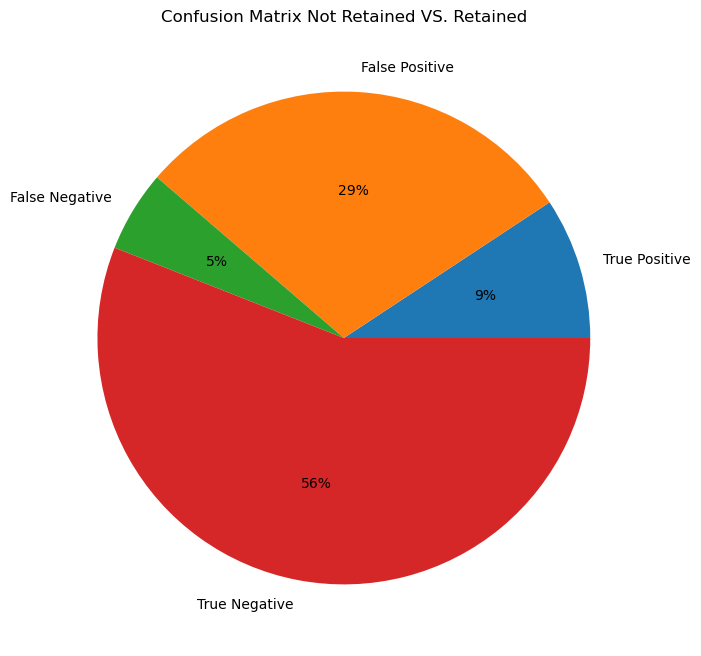

In [67]:
# Pie chart of the confusion matrix to show results visually - best performing model ADA Boosted

import matplotlib.pyplot as plt

plt.figure (figsize=(8,8))

labels = ["True Positive", "False Positive", "False Negative", "True Negative"]
values = [94, 298, 54, 567]

plt.pie(values, labels=labels, autopct = "%.lf%%")
plt.title('Confusion Matrix Not Retained VS. Retained')

plt.show()

#9 % predicted to not retain, 56% to retain, 29% incorrectly predicted to retain , 5% incorrectly predicted to not retain